In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import seaborn as sns

In [52]:
style.use('seaborn-poster')
style.use('seaborn-darkgrid')

This dataset contains audio features of over 6,000 tracks from the Spotify API, ranging from the 1960's to the 2010's. The 'Target' value of each track indicates whether the track appeared in the Billboard Hot 100 charts for that decade. We'll start by looking at the dataset's head, and look for possible correlations between variables. 

In [53]:
datasets = ['dataset-of-60s.csv', 'dataset-of-70s.csv', 'dataset-of-80s.csv', 'dataset-of-90s.csv', 'dataset-of-00s.csv', 'dataset-of-10s.csv']
dflist = []

for dataset in datasets:
    df = pd.read_csv(dataset)
    dflist.append(df)
    
df = pd.concat(dflist)
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,0


In [49]:
print(list(df.columns))

['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target']


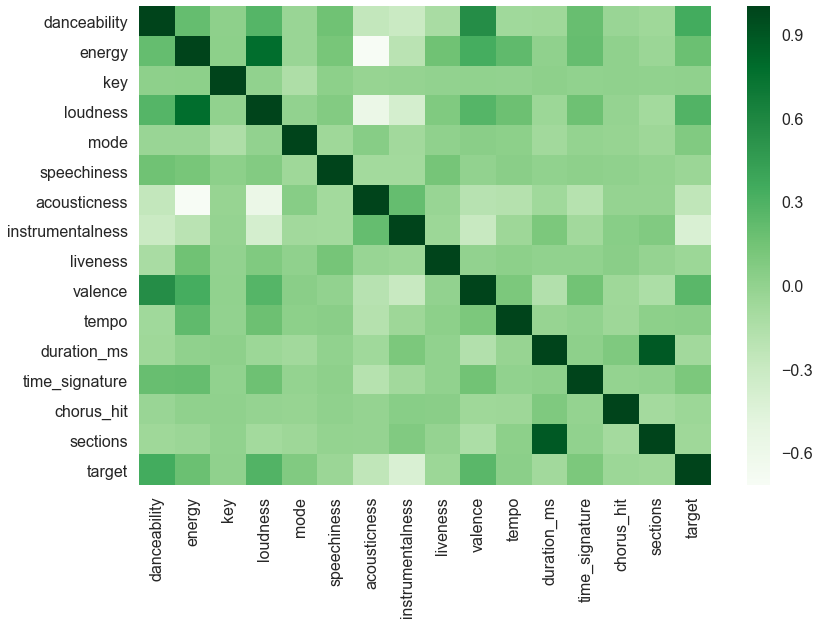

In [4]:
sns.heatmap(df.corr(), cmap='Greens')
plt.show()

This heatmap indicates a strong correlation between 'energy' and 'loudness'. The number of sections in a song also strongly correlates with its duration. While not as significant, there 'danceability' correlates with 'target' and 'valence'. 

Additionaly, there appear to be negative correlations between 'instrumentalness' and 'target', 'acousticness' and 'energy', and 'loudness' and 'acousticness'. This indicates that songs with more frequent vocals are more likely to be a hit. 

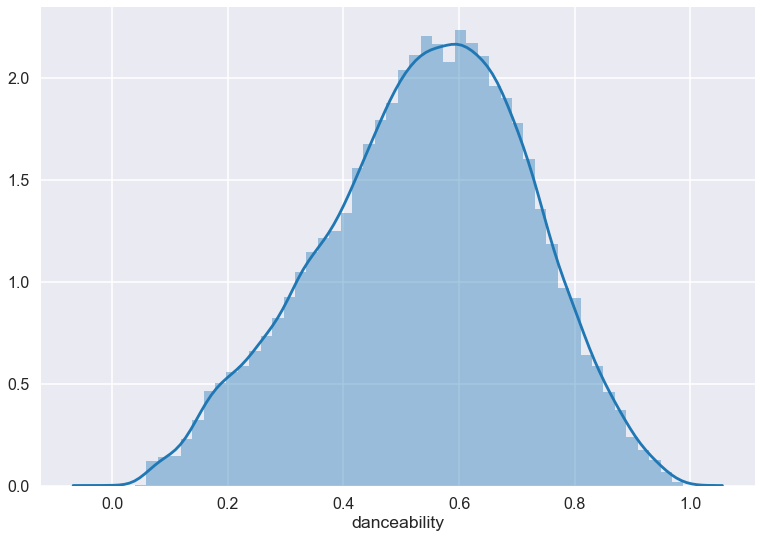

In [5]:
sns.distplot(df['danceability'], bins=50)
plt.show()

The danceability score is calculated as a float value between 0 and 1, where 1 is the most danceable. Here there is a clear peak around .6. In the heatmap there was a correlation between target and danceability, suggesting that this may be one of the more important features in hit songs. 

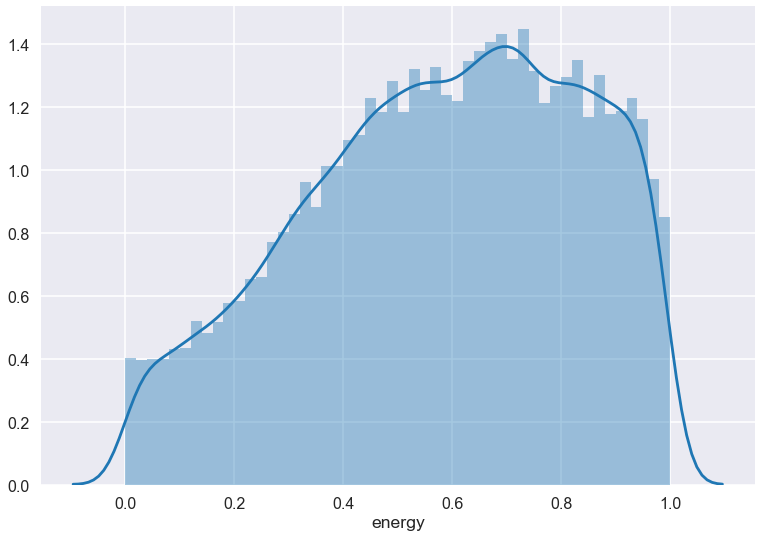

In [6]:
sns.distplot(df['energy'], bins=50)
plt.show()

Energy is calculated similarly to danceability. This dataset contains mostly high energy songs. Though the heatmap didn't indicate a very strong correlation between the energy and target variables, it is possible that low energy songs are under-represented in this dataset. 

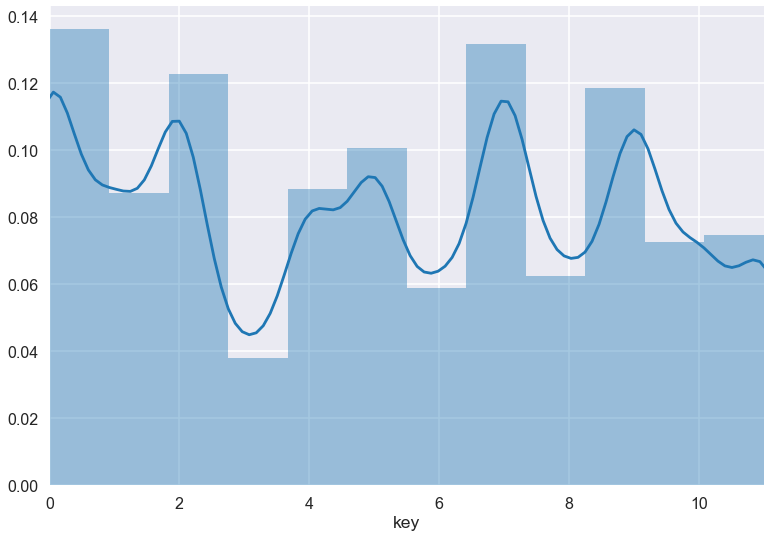

In [7]:
xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.distplot(df['key'], bins=12)
plt.xlim(0, len(xticks))
plt.show()

There are 12 possible keys in music. In this dataset, 0 corresponds to the key of C, 1 is C#, etc. Overall C# seems to be the most popular key among these songs, with D# overhelmingly the least popular. The main reason to choose one key over another is to accomodate a singer's vocal range, so it may be that D# is not a good range for many singers. In the heatmap the key did not have strong correlations with any other variables, so it is doubtful that choice of key affects hit potential in a strong way. 


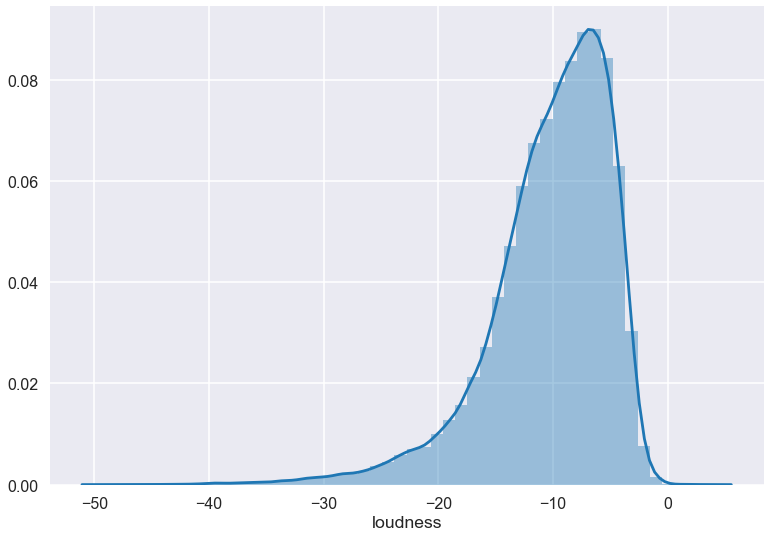

In [8]:
sns.distplot(df['loudness'], bins=50)
plt.show()

The loudness category is measured by the average decible rating per track. Recently, a phenomenon dubbed the 'loudness wars' has seen a trend in recordings being pushed louder and louder so that they stand out among other tracks for a listener's attention. Most of the tracks in this dataset are between -20 and 0 db. Later on we will examine whether tracks are increasing in loudness over time. 


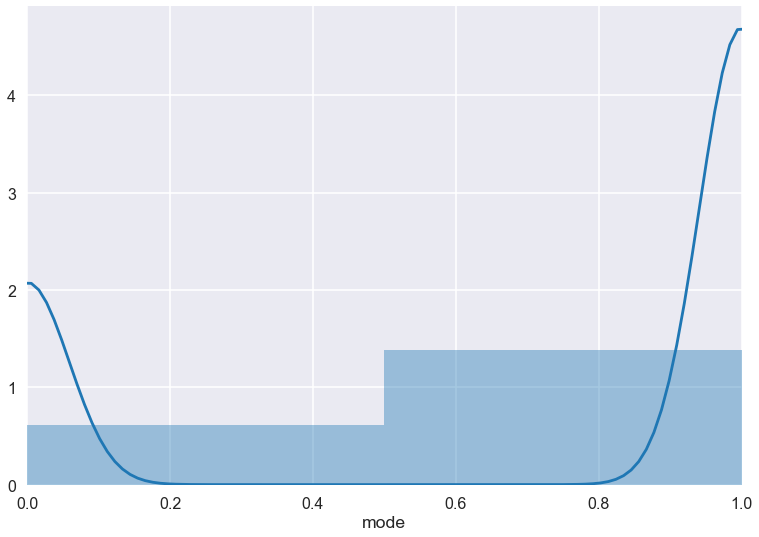

In [9]:
sns.distplot(df['mode'], bins=2)
plt.xlim(0,1)
plt.show()

Mode refers to whether a track is in a major or minor key. In this dataset, 0 represents minor and 1 represents major. It seems that major key songs tend to be more popular.

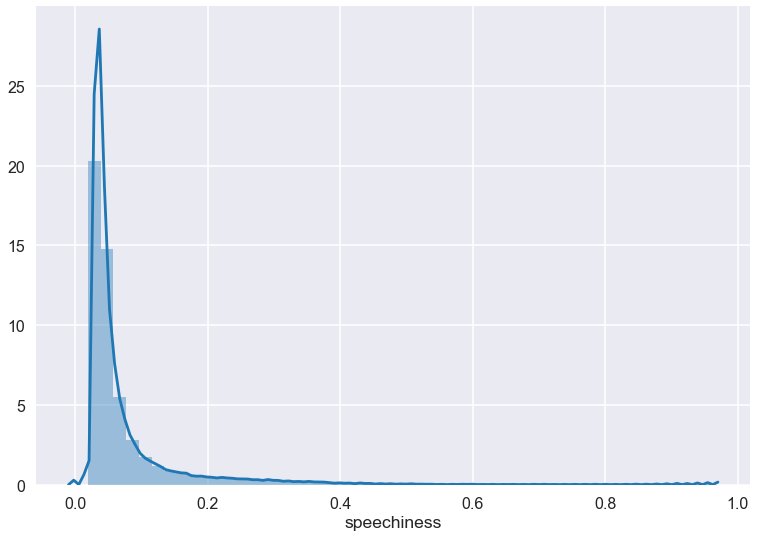

In [10]:
sns.distplot(df['speechiness'], bins=50)
plt.show()

speechiness is a representation of the presence of spoken words in the track, a speechiness rating of 1.0 would indicate a recording of something like an audio book. It is important to remember that pitched singing is not included in the speechiness rating, so this suggests that most songs in this dataset are sung rather than spoken. 

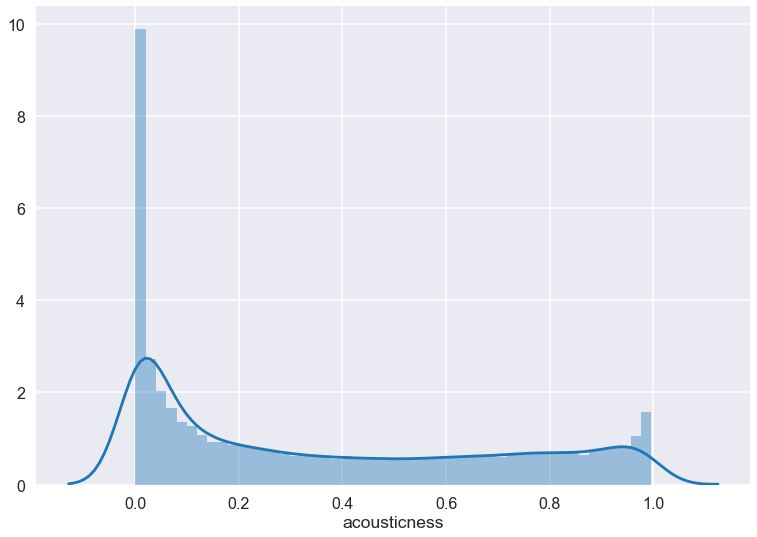

In [11]:
sns.distplot(df['acousticness'], bins=50)
plt.show()

acousticness is a confidence rating on whether a track is performed with acoustic instruments, where 1.0 suggests that the track is completely acoustic. Most of the data has a very low acousticness rating, suggesting that electronic instruments are more widely represented here. Later on we will look at whether songs have become more electronic over time.  

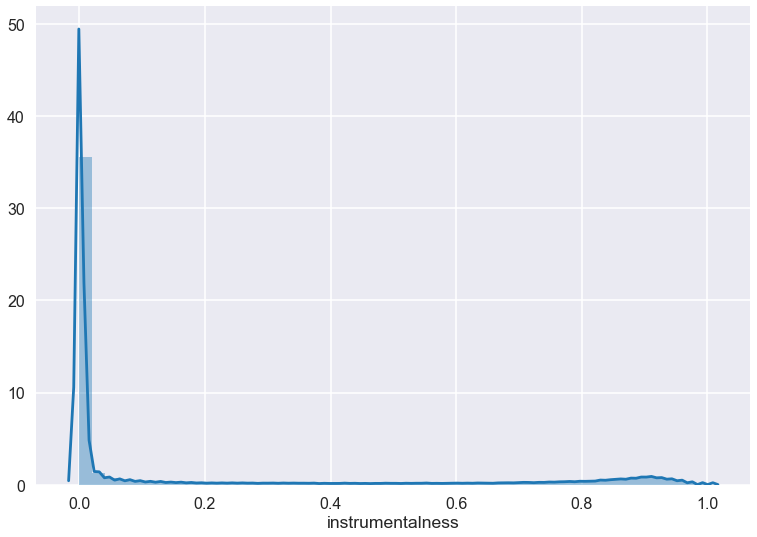

In [12]:
sns.distplot(df['instrumentalness'], bins=50)
plt.show()

The instrumentalness rating determines the vocal to instrumental ratio of a track, where 1.0 is completely instrumental. The vast majority of songs in this dataset are extremely vocal heavy. 

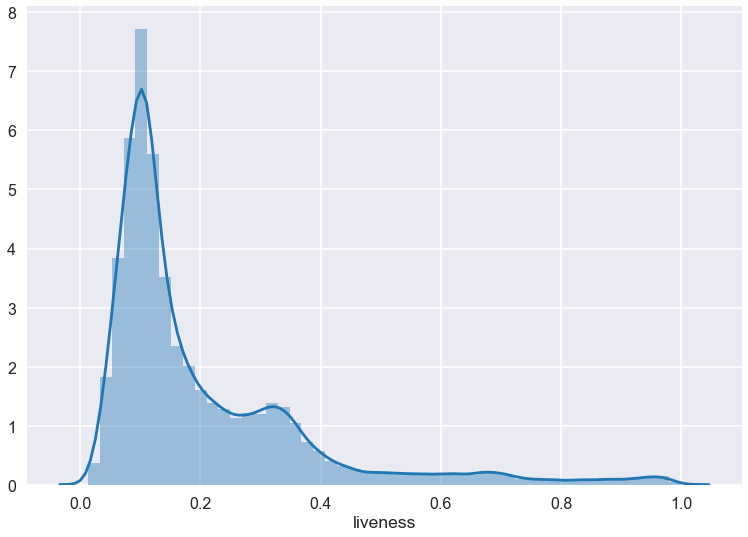

In [13]:
sns.distplot(df['liveness'], bins=50)
plt.show()

The liveness rating describes confidence that the recording is from a live concert. Overall the vast majority of these songs were recorded in a studio environment. 

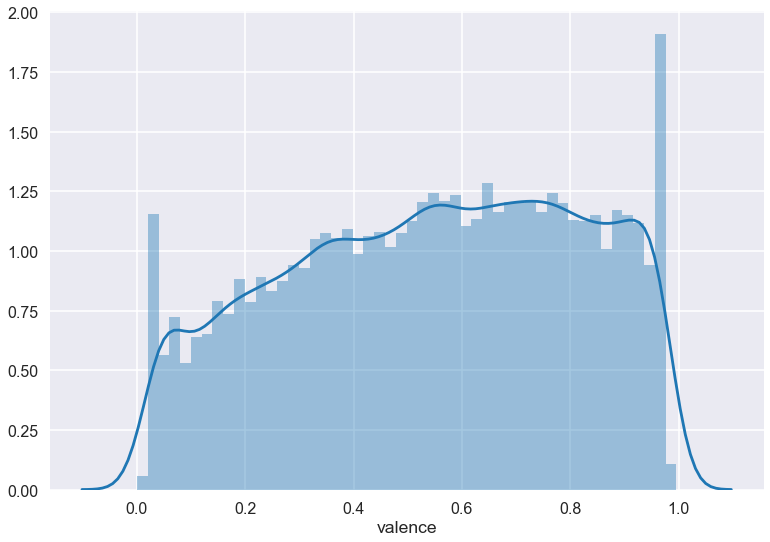

In [14]:
sns.distplot(df['valence'], bins=50)
plt.show()

Valence referse to the "positivity" or "cheeriness" of the track, where 1.0 is the most "cheery". The data is fairly evenly distributed here, with noticeable spikes at either end of the range. 

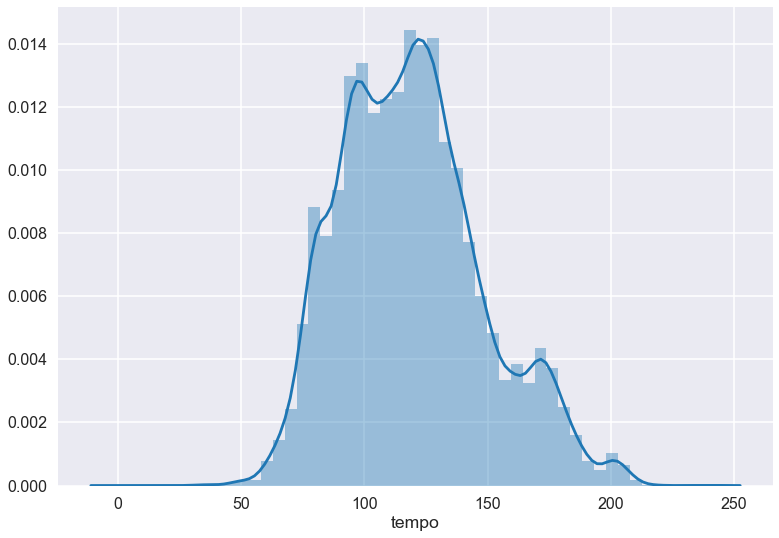

In [15]:
sns.distplot(df['tempo'], bins=50)
plt.show()

The tempo of each track is measured in beats per minute. the 90, 120, and 140 ranges seem to be most popular. 

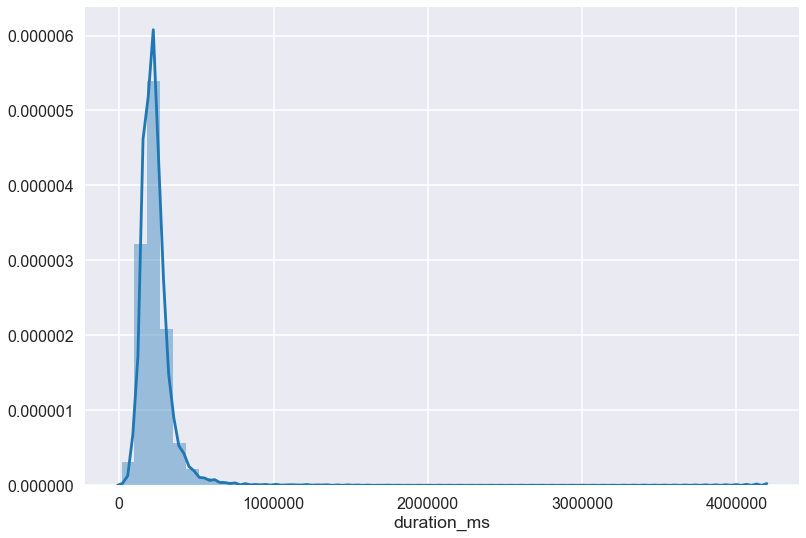

In [16]:
sns.distplot(df['duration_ms'], bins=50)
plt.show()

The majority of songs are clustered around 250000 ms, or 3.5 minutes. This is considered standard lenght for a song to be played on the radio, so this is relatively unsurprising. 

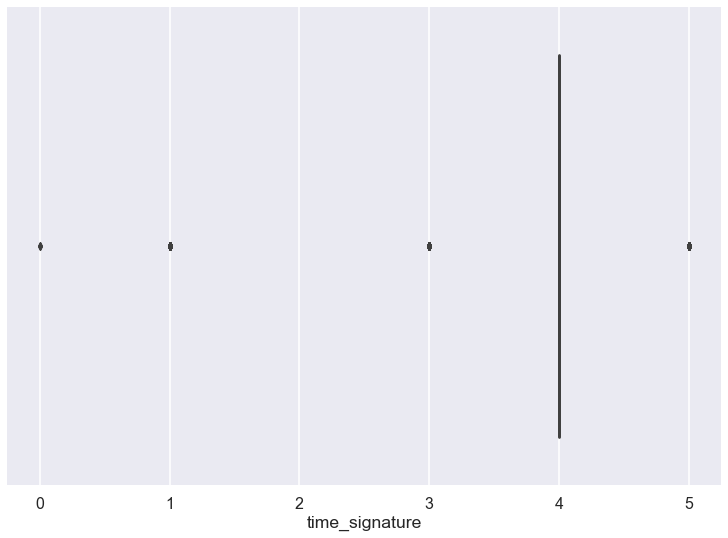

In [17]:
sns.boxplot(df['time_signature'])
plt.show()

In [18]:
df['time_signature'].value_counts()

4    36297
3     3840
5      595
1      371
0        3
Name: time_signature, dtype: int64

In [19]:
df.loc[df['time_signature'] == 0]

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
6857,Trust In Me,Etta James,spotify:track:5Zu9mG353GB3p26t7M5AmR,0.0000,0.377000,10,-6.777,0,0.0000,0.776,0.000,0.3900,0.0000,0.000,178467,0,26.02934,7,1
5676,Nanou2,Aphex Twin,spotify:track:6Wei2NUSG66WzLiqSuQAy5,0.3380,0.000982,8,-28.820,1,0.0465,0.977,0.239,0.0966,0.0776,93.066,205187,0,38.45690,9,0
3753,Black Metal,Sykelig Englen,spotify:track:6NS5IBuW00Glj9Z2xCvPkO,0.0622,0.855000,5,-12.989,1,0.1230,0.019,0.187,0.1310,0.0364,72.794,209466,0,141.77337,8,0


The overwhelming majority of the songs are in 4/4 time. This is not particularly surprising as 4/4 is by far the most common time in modern music. There are some appearances of 3/4, and 5/4, and very few in 1/4. Three outliers are listed in the dataset as being in 0/4 time, which is musically impossible. The Spotify API must have had difficulty detecting the time signature of these songs.

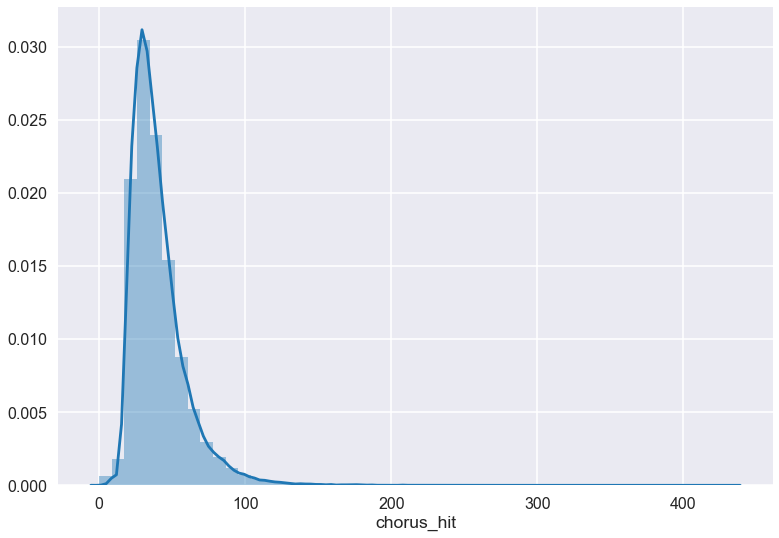

In [20]:
sns.distplot(df['chorus_hit'], bins=50)
plt.show()

The chorus_hit represents the best estimate of when the chorus begins in the song. This seems mostly clustered around 30-50

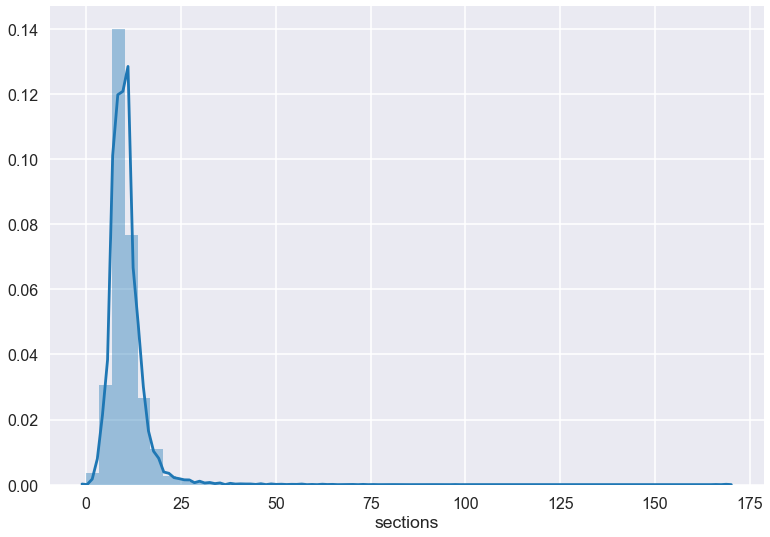

In [21]:
sns.distplot(df['sections'], bins=50)
plt.show()

Sections refers to the number of different musical parts in a song. There is a clear trend of songs having around 10 sections. 

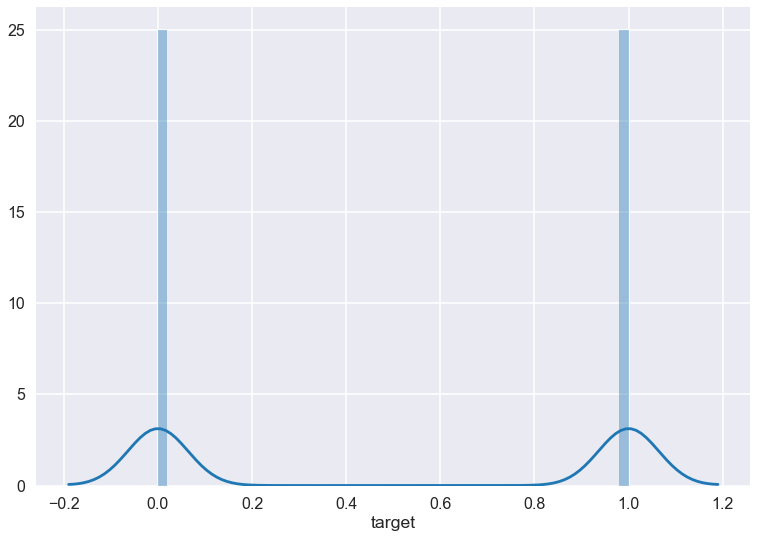

In [22]:
sns.distplot(df['target'], bins=50)
plt.show()

Target refers to whether a song appeared in the billboard top 100 charts. It appears our data is evenly split between 'hit' and 'flop'. 

Now that we've examined the variables of the entire dataset, let's take a look at things broken down by decade. 

In [54]:
df60 = pd.read_csv('dataset-of-60s.csv')
df70 = pd.read_csv('dataset-of-70s.csv')
df80 = pd.read_csv('dataset-of-80s.csv')
df90 = pd.read_csv('dataset-of-90s.csv')
df00 = pd.read_csv('dataset-of-00s.csv')
df10 = pd.read_csv('dataset-of-10s.csv')

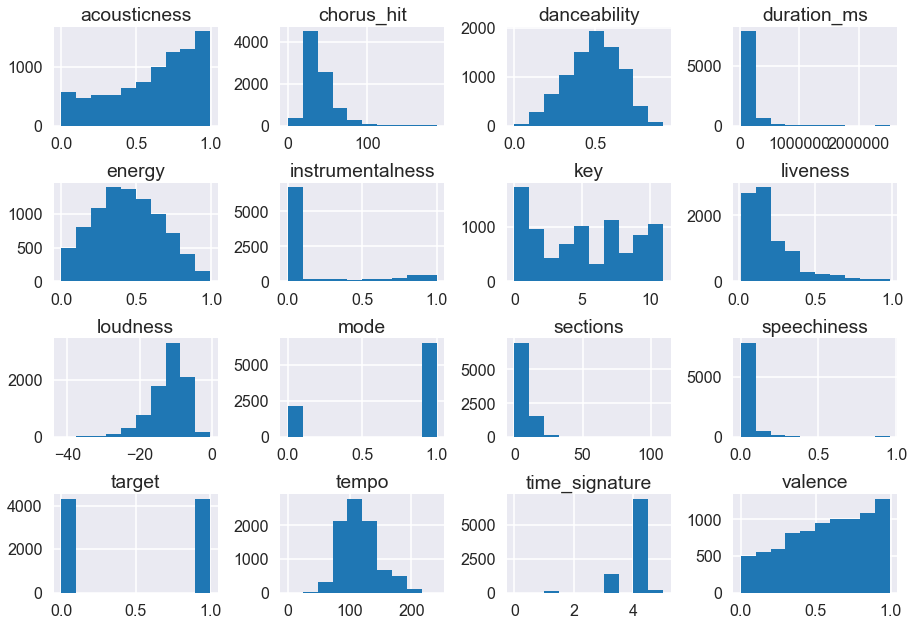

In [60]:
df60.hist()
plt.tight_layout()
plt.show()

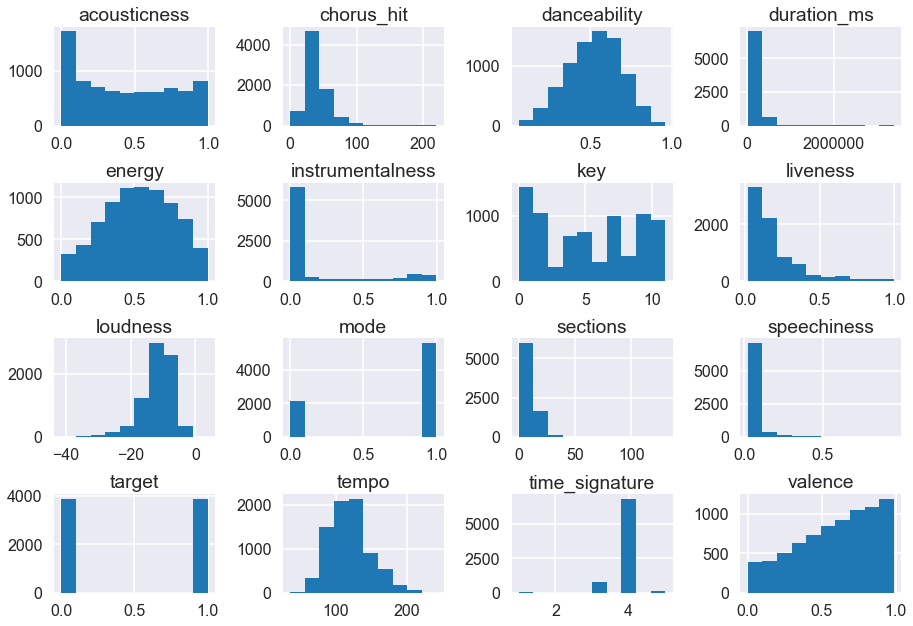

In [25]:
df70.hist()
plt.tight_layout()
plt.show()

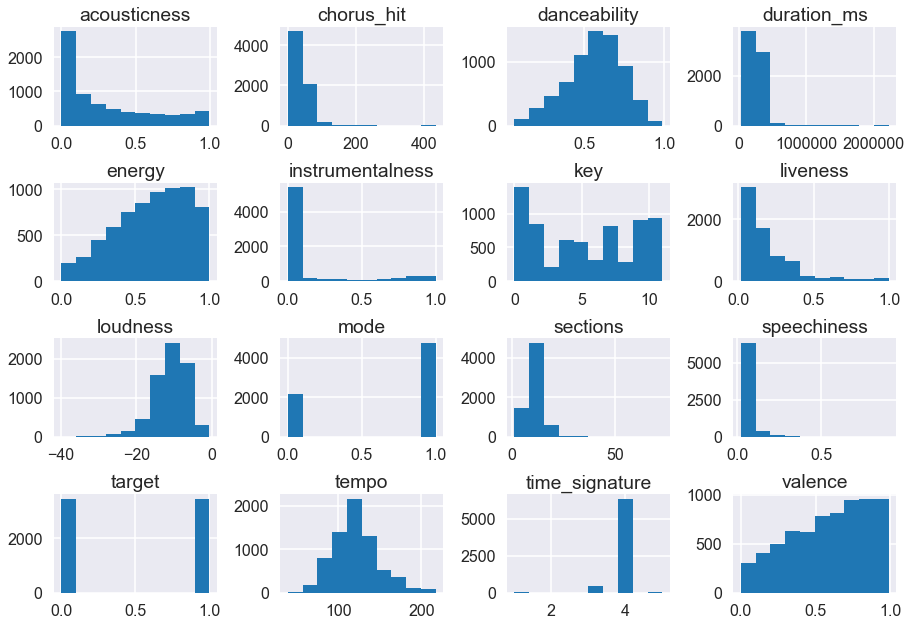

In [26]:
df80.hist()
plt.tight_layout()
plt.show()

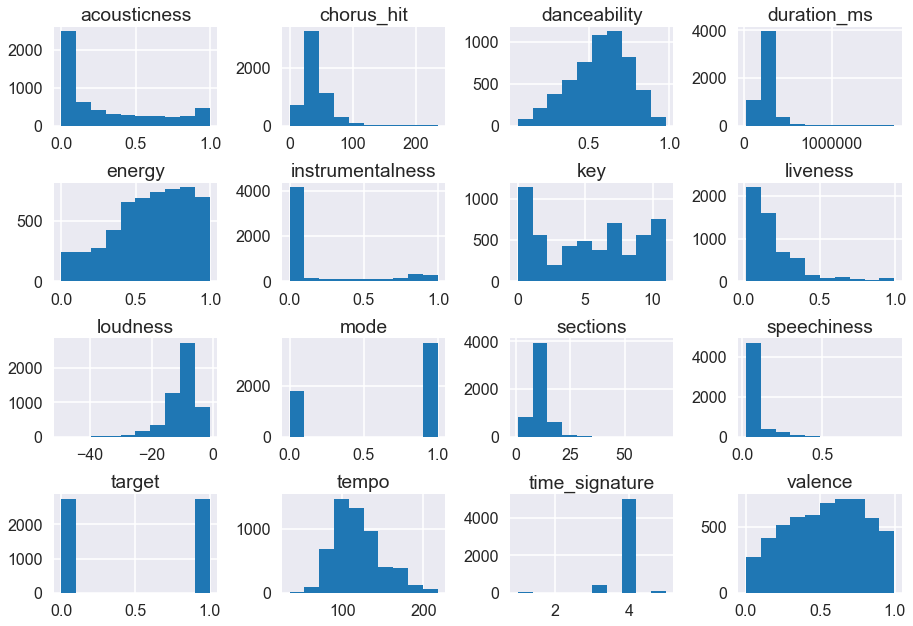

In [27]:
df90.hist()
plt.tight_layout()
plt.show()

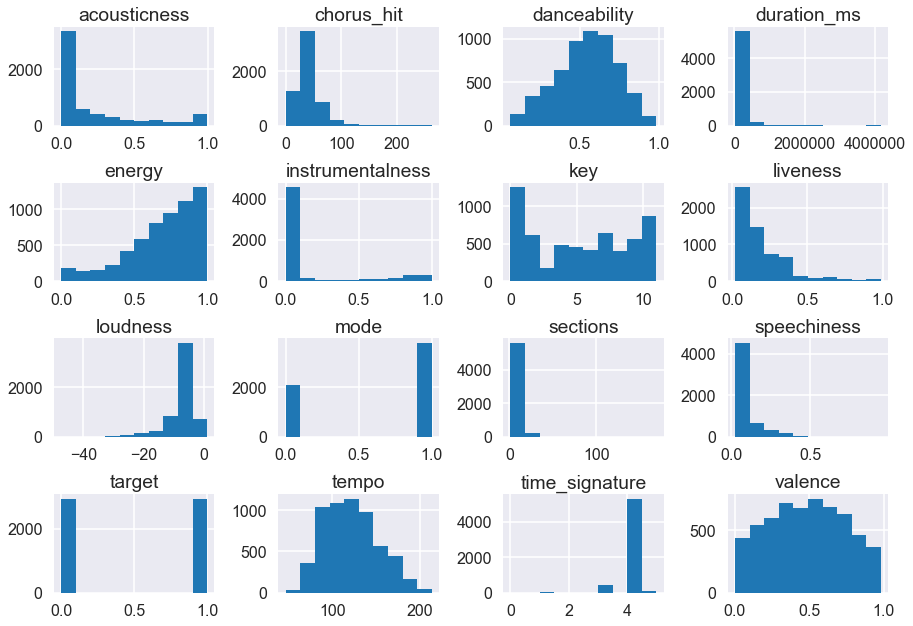

In [28]:
df00.hist()
plt.tight_layout()
plt.show()

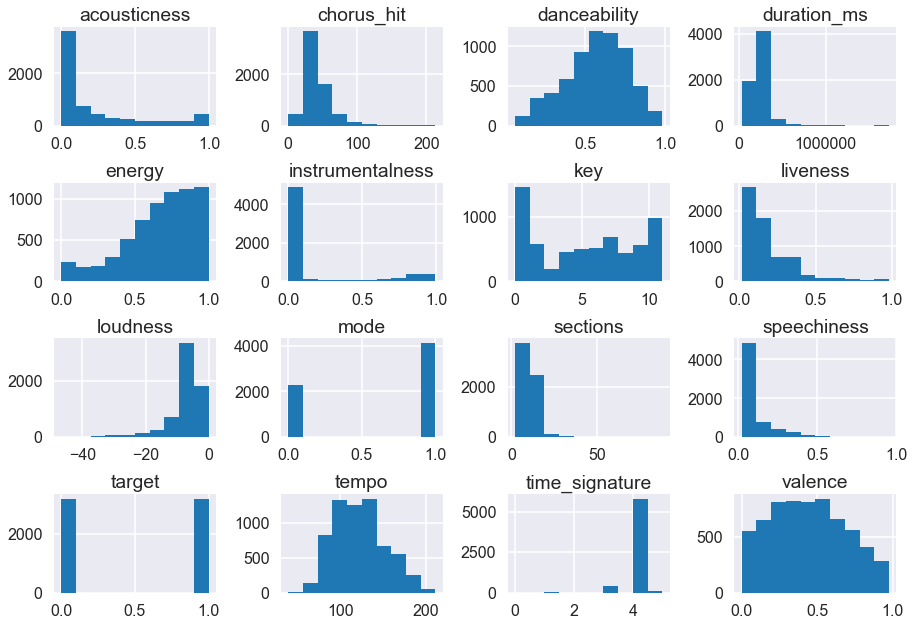

In [29]:
df10.hist()
plt.tight_layout()
plt.show()

Breaking things down by decade, we can see some interesting trends. 

Acousticness has very clearly decreased over the years, beginning in the 1970s. The tracks from the 60s had acousticness ratings closer to 1, which get closer to 0 each decade. 

Chorus Hit seems fairly uniform over the decades, except for the 1980s where it occured earlier in the song.

Danceability is also relatively unchanging through the years, although the 1960s had slightly lower scores in this category overall. 

Song duration has fluctuated through the decades. Songs were shorter in the 60s and 70s, increased in length in the 80s and 90s, went back down in the 2000s, and then got longer again in the 2010s. 

Energy has steadily increased over the years, in the 60s the majority of the songs had energy ratings around 0.4, and by the 2010s most have gone up to 1. 

Instrumentalness, Key and Liveness have remained relatively unchanged through the decades.

Loudness, as I suspected earlier, has clearly increased each decade. 

Mode has not changed significantly over time, with major key songs being clearly more popular. 

The amount of sections per song appears to directly follow duration. Shorter songs in the 60s and 70s means less sections, and the decades that favored longer songs have more. 

Speechiness, Time Signature, and Target appear fairly uniform across decades. 

Tempo has not only increased over time, but more recent decades have higher variance in tempo. 

Valence has decreased over time, particularly starting in the 90s. It appears modern music favors more sad songs. 





In [30]:
dfhit = df.loc[df['target'] == 1]
dfflop = df.loc[df['target'] == 0]

Finally, lets take a look at the differences between hit and flop songs. 

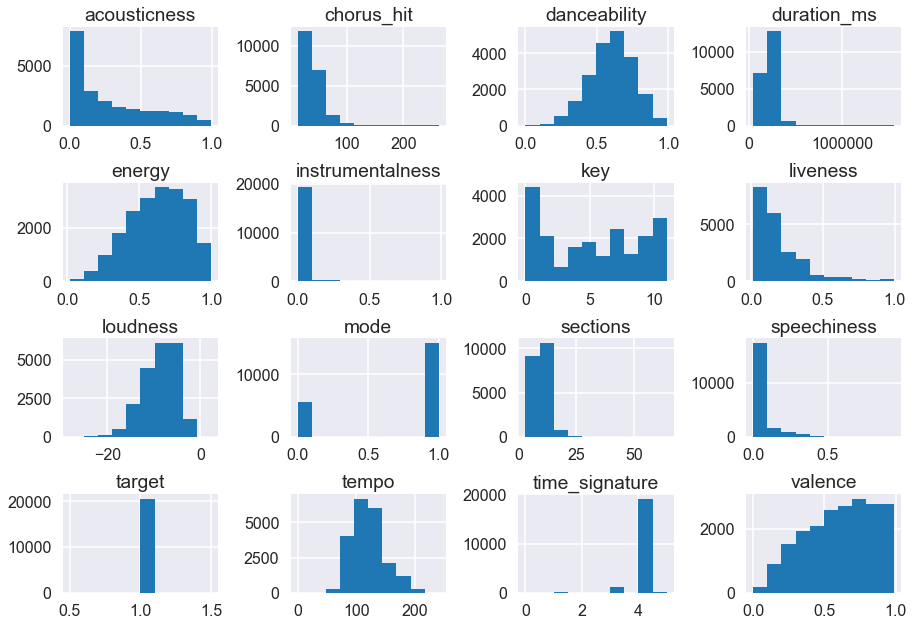

In [31]:
dfhit.hist()
plt.tight_layout()
plt.show()

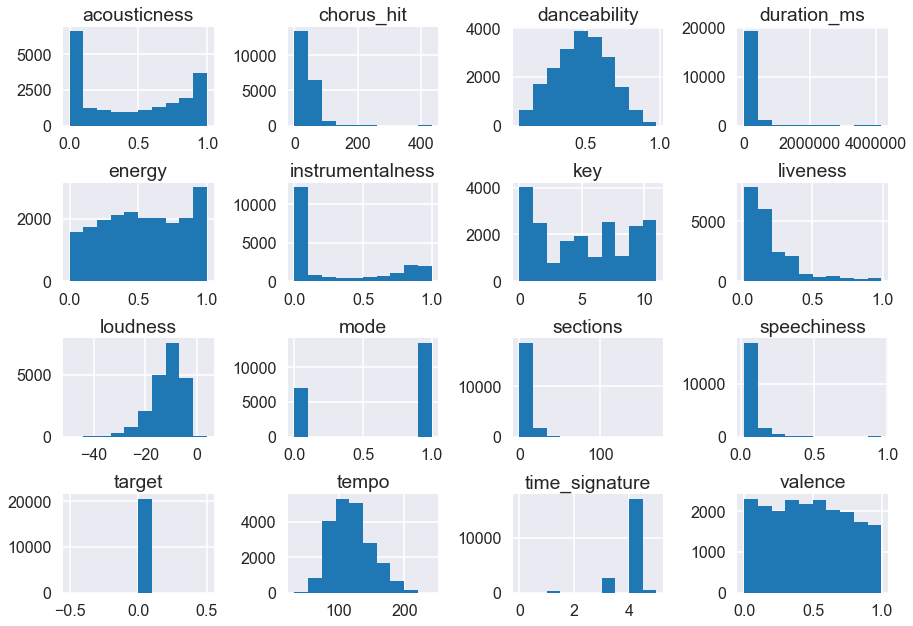

In [32]:
dfflop.hist()
plt.tight_layout()
plt.show()

The standouts here are that the hit songs have lower acousticness, the chorus appears earlier in the song, the danceability is higher, the duration is slightly longer, the energy is around .8, they are less instrumental, the loudness is between -8 and -5 db, there are more sections in the song, and the valence is slightly higher. 

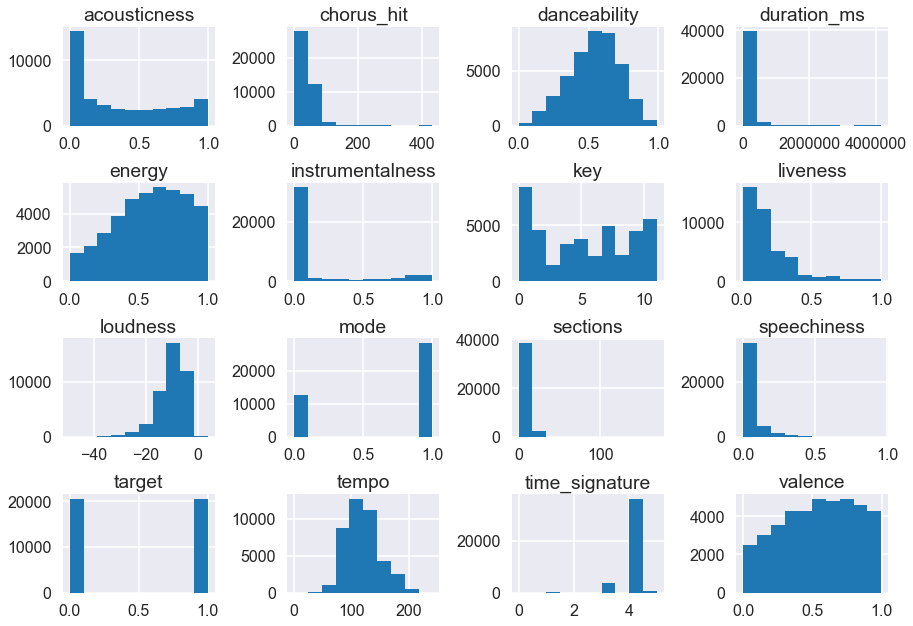

In [33]:
df.hist()
plt.tight_layout()
plt.show()

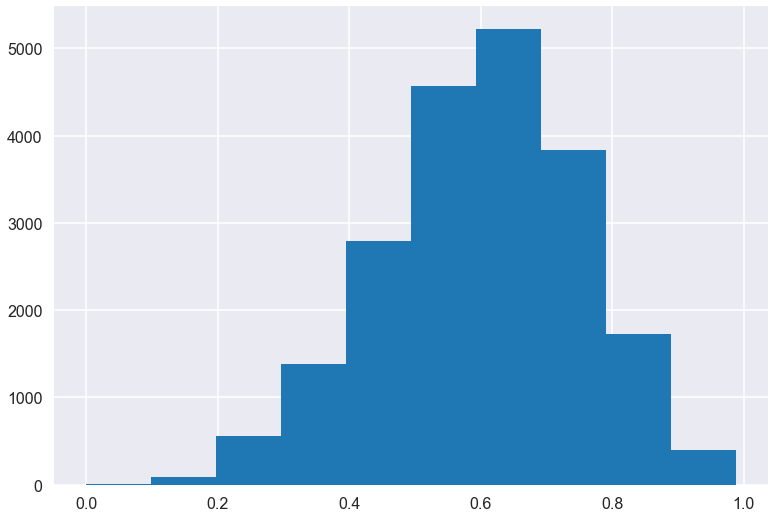

In [36]:
dfhit['danceability'].hist()

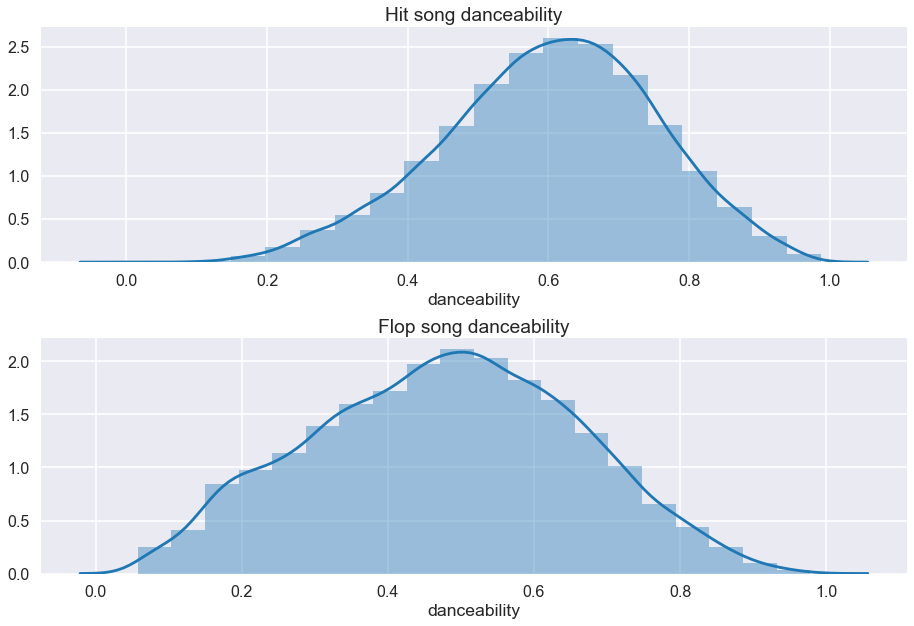

In [43]:
plt.subplot(2, 1, 1)
sns.distplot(dfhit.danceability, bins=20)
plt.title('Hit song danceability')

plt.subplot(2, 1, 2)
sns.distplot(dfflop.danceability, bins=20)
plt.title('Flop song danceability')
plt.tight_layout()

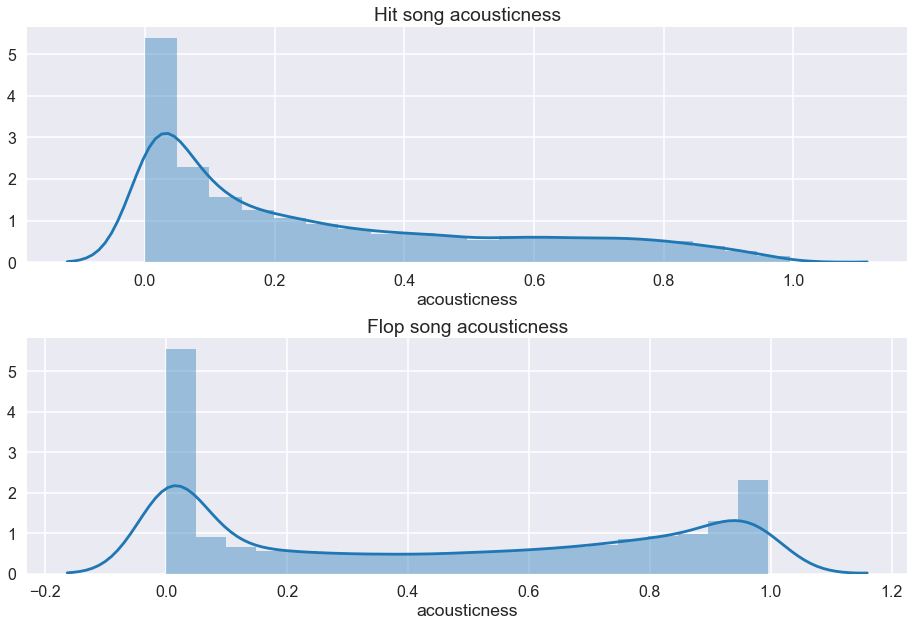

In [44]:
plt.subplot(2, 1, 1)
sns.distplot(dfhit.acousticness, bins=20)
plt.title('Hit song acousticness')

plt.subplot(2, 1, 2)
sns.distplot(dfflop.acousticness, bins=20)
plt.title('Flop song acousticness')
plt.tight_layout()

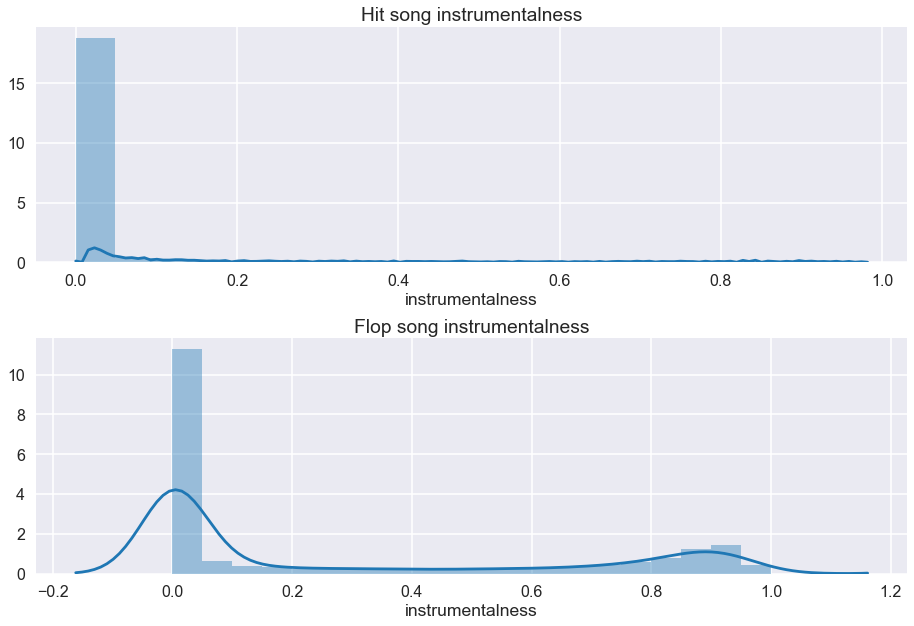

In [46]:
plt.subplot(2, 1, 1)
sns.distplot(dfhit.instrumentalness, bins=20)
plt.title('Hit song instrumentalness')

plt.subplot(2, 1, 2)
sns.distplot(dfflop.instrumentalness, bins=20)
plt.title('Flop song instrumentalness')
plt.tight_layout()

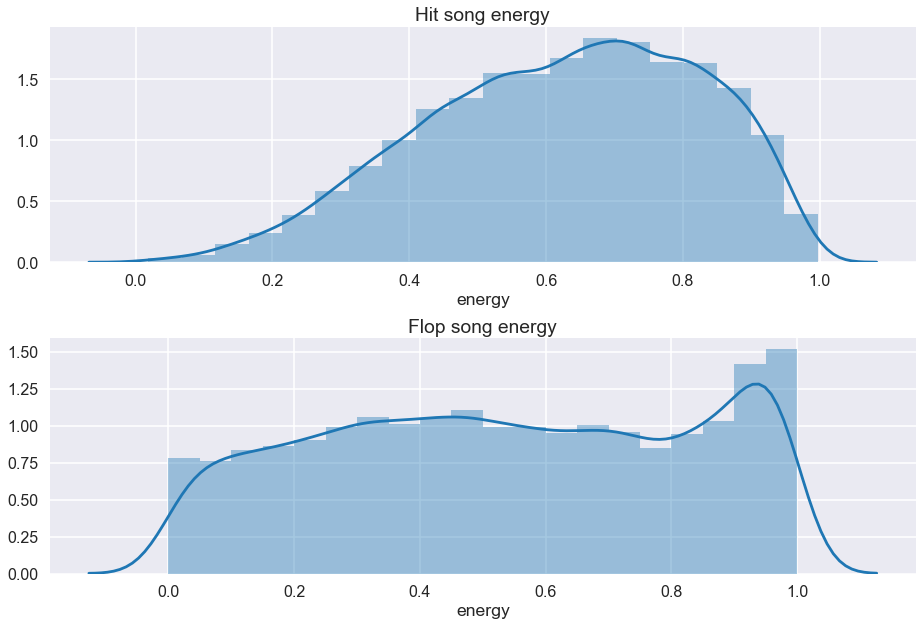

In [47]:
plt.subplot(2, 1, 1)
sns.distplot(dfhit.energy, bins=20)
plt.title('Hit song energy')

plt.subplot(2, 1, 2)
sns.distplot(dfflop.energy, bins=20)
plt.title('Flop song energy')
plt.tight_layout()